![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn import metrics

In [171]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head(100)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2,4
2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3,5
2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33,6


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [130]:
# Celda 1.1
print('Tabla de frecuencia de la variable workingday')
print(pd.value_counts(bikes['workingday']))
print()
print('Tabla de frecuencia relativa  de la variable workingday')
print(100*bikes['workingday'].value_counts()/len(bikes['workingday']))
print()
print('Resumen descriptivo de la variable workingday')
bikes['workingday'].describe()

Tabla de frecuencia de la variable workingday
1    7412
0    3474
Name: workingday, dtype: int64

Tabla de frecuencia relativa  de la variable workingday
1    68.087452
0    31.912548
Name: workingday, dtype: float64

Resumen descriptivo de la variable workingday


count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

A partir del análisis descriptivo de la variable se puede concluir que en total se cuenta con 10,886 observaciones de las cuales 7,412 que representan el 68% del total corresponden a viajes realizados en dias laborales.

In [131]:
# Celda 1.2
print('Tabla de frecuencia de la variable hour')
print(bikes['hour'].value_counts().sort_index())
print()
print('Tabla de frecuencia relativa  de la variable hour')
print(100*bikes['hour'].value_counts().sort_index()/len(bikes['hour']))
print()
print('Resumen descriptivo de la variable hour')
bikes['hour'].describe()

Tabla de frecuencia de la variable hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: hour, dtype: int64

Tabla de frecuencia relativa  de la variable hour
0     4.179680
1     4.170494
2     4.115378
3     3.977586
4     4.060261
5     4.152122
6     4.179680
7     4.179680
8     4.179680
9     4.179680
10    4.179680
11    4.179680
12    4.188866
13    4.188866
14    4.188866
15    4.188866
16    4.188866
17    4.188866
18    4.188866
19    4.188866
20    4.188866
21    4.188866
22    4.188866
23    4.188866
Name: hour, dtype: float64

Resumen descriptivo de la variable hour


count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

A partir del análisis descriptivo de la variable se puede concluir que en total se cuenta con 10,886 observaciones de las cuales se tienen 24 categorias que corresponden a las horas del día y se puede apreciar que cada categoría cuenta con el mismo número de observaciones, que en promedio representan el 4% del total de las observaciones.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

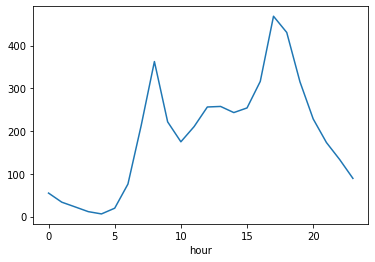

In [132]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

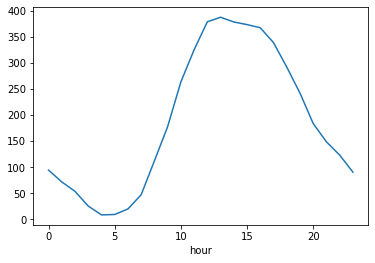

In [133]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

no_workingday=bikes['workingday']==0
bikes[no_workingday].groupby('hour').total.mean().plot()


A partir de la gráfica se puede inferir que las horas mas concurridas en fines de semana se encuentran entre las 12 hrs y 17 hrs.

<AxesSubplot:xlabel='hour'>

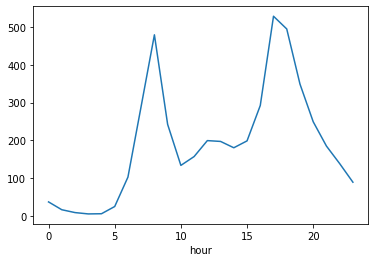

In [134]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
workingday=bikes['workingday']==1

bikes[workingday].groupby('hour').total.mean().plot()

A apartir de la gráfica se puede apreciar que las horas más concurridas en los días laborales coinciden con los horarios del inicio y fin de la jornada laboral

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [135]:
# Celda 3

XTotal = bikes.loc[:,['workingday','hour']]

yTotal = bikes['total']

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

modelo = LinearRegression()
modelo.fit(X = XTrain , y = yTrain)

YPredicion = modelo.predict(XTest)

print("Intercept:", modelo.intercept_)
print('Coeficiente workingday: ', modelo.coef_[0])
print('Coeficiente hour: ', modelo.coef_[1])
print('Error cuadrático medio: ',mean_squared_error(yTest, YPredicion))
print('Raiz error cuadrático medio: ',math.sqrt(mean_squared_error(yTest, YPredicion)))
print("Coeficiente de determinación R^2:", modelo.score(XTest, yTest))

Intercept: 63.52695347088172
Coeficiente workingday:  6.77044099515647
Coeficiente hour:  10.550994216815008
Error cuadrático medio:  27657.435595059633
Raiz error cuadrático medio:  166.3052482486937
Coeficiente de determinación R^2: 0.15357074523449832


Lo que podemos concluir que el modelo de regresión lineal puede explicar solo un 15% la variación de la variable de respuesta, por lo que deberia analizarce otras alternativas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [136]:
# Celda 4
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=3, num_pct=6)
tree

{'y_pred': 1,
 'y_prob': 189.5754626456477,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 7293,
 'gain': 18062.068697976065,
 'sl': {'y_pred': 1,
  'y_prob': 25.225806451612904,
  'level': 1,
  'split': [1, 2.0],
  'n_samples': 1827,
  'gain': 398.9725847695497,
  'sl': {'y_pred': 1,
   'y_prob': 44.7456,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 623,
   'gain': 1411.9241805181791,
   'sl': {'y_pred': 1,
    'y_prob': 83.4010152284264,
    'level': 3,
    'split': -1,
    'n_samples': 195,
    'gain': 222.06986607994804},
   'sr': {'y_pred': 1,
    'y_prob': 26.830232558139535,
    'level': 3,
    'split': -1,
    'n_samples': 428,
    'gain': 212.90785662379744}},
  'sr': {'y_pred': 1,
   'y_prob': 15.068822553897181,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 1204,
   'gain': 79.47710603149108,
   'sl': {'y_pred': 1,
    'y_prob': 24.04568527918782,
    'level': 3,
    'split': -1,
    'n_samples': 392,
    'gain': 558.4530173001542},
   'sr': {'y_pred': 1,
    

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [137]:
# Celda 5
max_depth_range = range(1, 20)

# Valores del RMSE para cada nivel de profundidad
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())

In [138]:
# Mejor métrica de RMSE dentro de los niveles de profundidadad generados

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.021802431553826787, 9)

Comparando las metricas de desempeño (RMSE) tanto de la Regresión Lineal y el Arbol de Decisión, podemos concluir que el Arbol tiene un mejor ajuste que la Regresión Lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [139]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [140]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [143]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Valores optimos Accuracy-Nivel
(0.6308888888888888, 2)
Profundidad del árbol: 2
Número de nodos terminales: 4


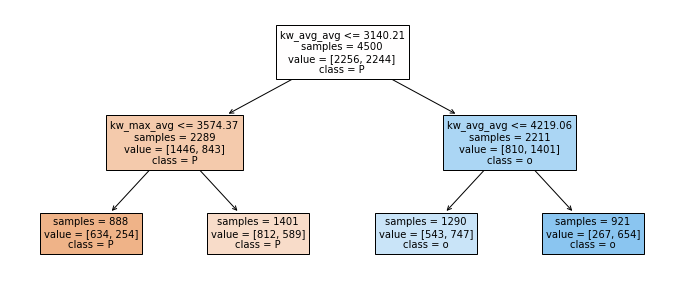

In [173]:
# Celda 6
max_depth_range = range(1, 20)

# Valores del RMSE para cada nivel de profundidad
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())
    
print('Valores optimos Accuracy-Nivel')
print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])


clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(XTrain, yTrain)

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = XTrain.columns,
            class_names   = 'Popular',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [174]:
modelo = LogisticRegression()
modelo.fit(X = XTrain , y = yTrain)

yPred = modelo.predict(XTest)

print('Error cuadrático medio: ',mean_squared_error(yTest, yPred))
print('Raiz error cuadrático medio: ',math.sqrt(mean_squared_error(yTest, yPred)))
print("Coeficiente de determinación R^2:", modelo.score(XTest, yTest))
print('F1 Score: ',f1_score(yTest, yPred))

Error cuadrático medio:  0.386
Raiz error cuadrático medio:  0.6212889826803627
Coeficiente de determinación R^2: 0.614
F1 Score:  0.6106254203093476


De acuerdo a las metricas de desempeño, el modelo de Arbol, tiene una ligera mejora en el ajuste, comparado con el modelo de Regresión Logistica

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [195]:
# Celda 7
# Creación de las 300 muestras
n_estimators = 300
np.random.seed(123)

n_samples = XTrain.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


### 1. 100 árboles de decisión donde max_depth = None

In [208]:
# Entrenamiento de 100 modelos de Arbol con las 100 muestras boostrap

n_arboles=100
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_arboles)
accuracy_Arbol1 = []

trees = {}
for i in range(n_arboles):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    accuracy_Arbol1.append(cross_val_score(trees[i], X_train.iloc[samples[i]], y_train.iloc[samples[i]], cv=10, scoring='accuracy').mean())
    
# Predicción para los datos del set de test con cada modelo

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_arboles)))
for i in range(n_arboles):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)
    
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_arboles / 2)).astype(np.int)


# Desempeño al hacer votación mayoritaria
F1_Arbol1=metrics.f1_score(y_pred, y_test)

print(F1_Arbol1)
print(sum(accuracy_Arbol1)/len(accuracy_Arbol1))

0.6618892508143323
0.8195888888888889


### 2. 100 árboles de decisión donde max_depth = 2

In [212]:
# Entrenamiento de 100 modelos de Arbol con las 100 muestras boostrap

n_arboles=100
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_arboles)
accuracy_Arbol2 = []

trees = {}
for i in range(n_arboles):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[100+i]], y_train.iloc[samples[100+i]])
    accuracy_Arbol2.append(cross_val_score(trees[i], X_train.iloc[samples[100+i]], y_train.iloc[samples[100+i]], cv=10, scoring='accuracy').mean())
    
# Predicción para los datos del set de test con cada modelo

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_arboles)))
for i in range(n_arboles):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)
    
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_arboles / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
F1_Arbol2=metrics.f1_score(y_pred, y_test)

print(F1_Arbol2)
print(sum(accuracy_Arbol2)/len(accuracy_Arbol2))

0.6558922558922559
0.6000466666666666


### 3. 100 regresiones logísticas

In [213]:
n_arboles=100
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_arboles)
accuracy_Reglog= []

Reglog = {}
for i in range(n_arboles):
    Reglog[i] = LogisticRegression()
    Reglog[i].fit(X_train.iloc[samples[200+i]], y_train.iloc[samples[200+i]])
    accuracy_Reglog.append(cross_val_score(trees[i], X_train.iloc[samples[200+i]], y_train.iloc[samples[200+i]], cv=10, scoring='accuracy').mean())
    
# Predicción para los datos del set de test con cada modelo

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_arboles)))
for i in range(n_arboles):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)
    
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_arboles / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
F1_Reglog=metrics.f1_score(y_pred, y_test)

print(F1_Reglog)
print(sum(accuracy_Reglog)/len(accuracy_Reglog))

0.6558922558922559
0.5970822222222218


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9